In [1]:
#导入包
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

#导入数据
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train_row = train.shape[0]  # 训练数据 1460 行
test_row = test.shape[0]    # 测试数据 1459 行

train.shape, test.shape


((1460, 81), (1459, 80))

In [2]:
print(train.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [3]:
print(test.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Ut

In [4]:
print( len( train.columns.values.tolist() ) )

s1 = set(train.columns.values.tolist())
s2 = set(test.columns.values.tolist())

s3 = s1.union(s2)  # 列名的并集的元素并没有大于原始集合的最大元素数，说明原来的两集合所有的列都是一至的，除了train 数据集多了一列“房屋售价” SalePrice
print( len(s3) )


81
81


In [5]:
full = pd.DataFrame()
full = pd.concat([train,test],ignore_index=True)  # 列数不一至的数据帧合并，缺失列的一方会添加空列(所有数据为空白)

In [6]:
full.head() #查看描述统计和信息
full.describe() #根据描述统计没有观察到异常值
full.info()
'''
通过info可以看出总共有2919 条数据，其中一些列有不同程度的数据缺失，包含数值型数据（LotFrontage）
和字符型数值（MSZoning），这就需要我们根据不同的数据类型进行相应的数据预处理。
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

'\n通过info可以看出总共有2919 条数据，其中一些列有不同程度的数据缺失，包含数值型数据（LotFrontage）\n和字符型数值（MSZoning），这就需要我们根据不同的数据类型进行相应的数据预处理。\n'

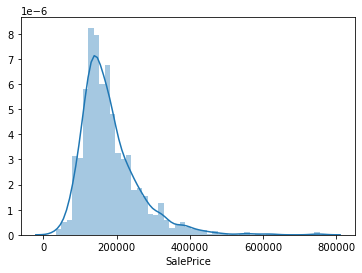

In [7]:
sns.distplot(train['SalePrice'])

In [8]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())  # 偏度（Skewness）> 0，长尾巴拖在右边
print("Kurtosis: %f" % train['SalePrice'].kurt())  # 峰度（Kurtosis）> 0, 比正态分布的高峰更加陡峭——尖顶峰

Skewness: 1.882876
Kurtosis: 6.536282


(-0.5, 1.5, 0.0, 800000.0)

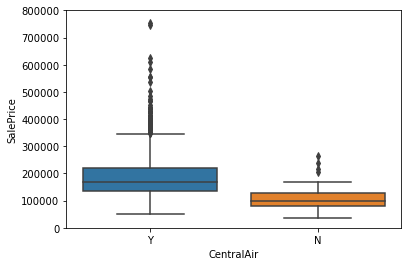

In [9]:
# CentralAir
var = 'CentralAir'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

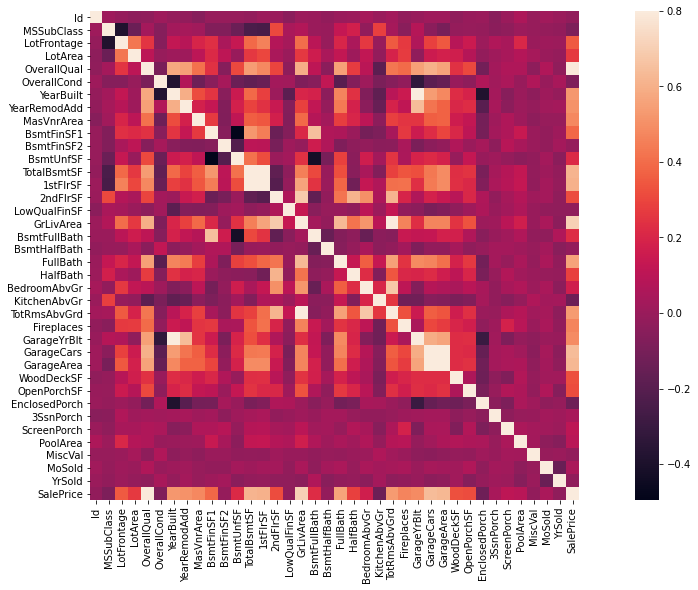

In [10]:
# 像素块越红表示两者之间相关性越强
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [11]:
# 查看缺失值
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64